In [31]:
## importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


In [2]:
from google.colab import files

uploaded=files.upload()

Saving diamonds (1).csv to diamonds (1).csv


In [3]:
dataset=pd.read_csv("diamonds (1).csv")

In [4]:
dataset.shape

(53940, 10)

In [5]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
dataset.drop(dataset[dataset['x']==0].index,inplace=True)
dataset.drop(dataset[dataset['y']==0].index,inplace=True)
dataset.drop(dataset[dataset['z']==0].index,inplace=True)

In [8]:
dataset.duplicated().sum()

145

In [9]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [10]:
# Numerical Columns

numerical_data = dataset.select_dtypes(['int64','float64'])

numerical_cols = numerical_data.columns

print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [20]:
# Categorical Columns

categorical_data = dataset.select_dtypes(['object'])

categorical_cols = categorical_data.columns

print('Categorical Columns : {}'.format(list(categorical_cols)))

Categorical Columns : ['cut', 'color', 'clarity']


## **EDA**

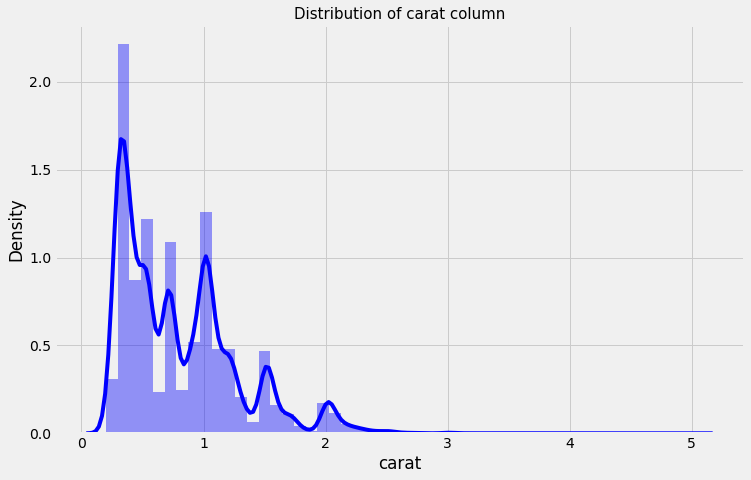

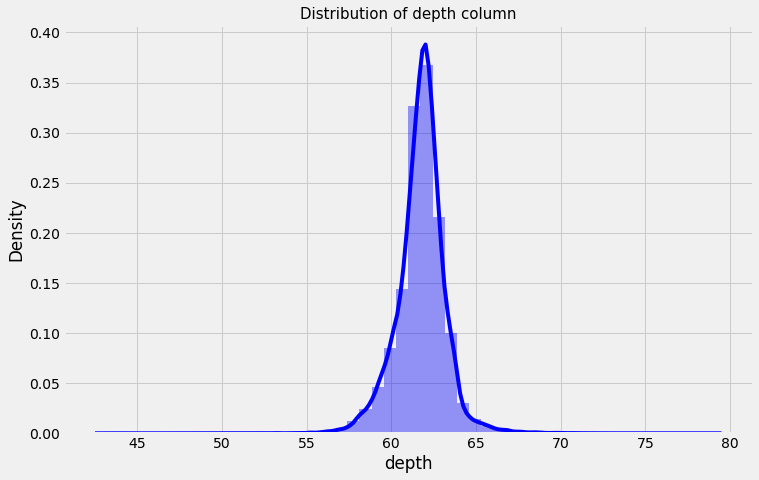

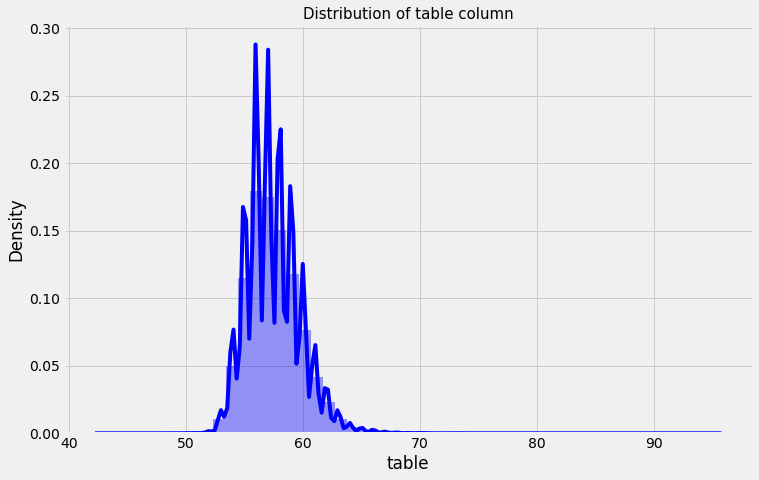

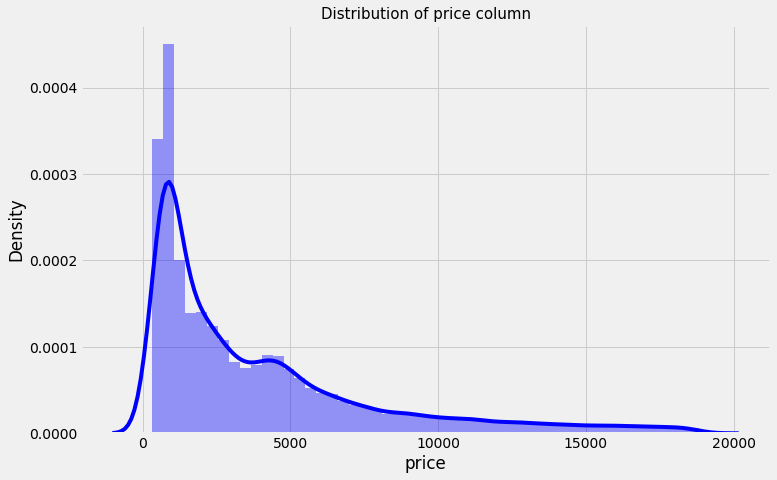

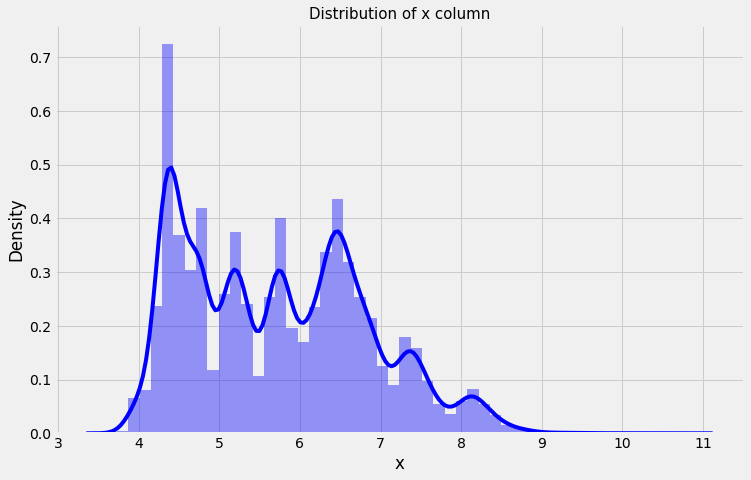

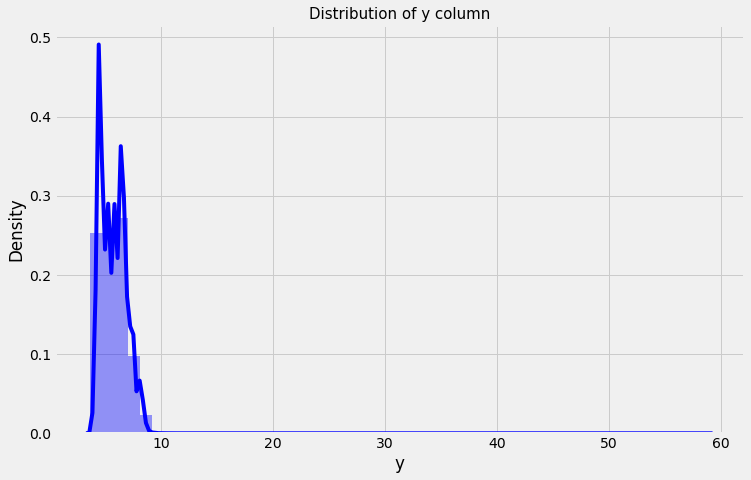

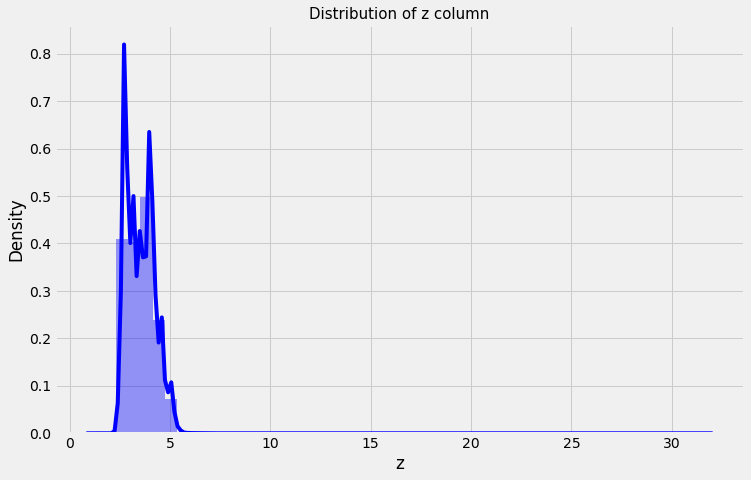

In [13]:
# Plotting the Histograms for the Numerical Columns
plt.style.use("fivethirtyeight")
for col in numerical_cols:
    plt.figure(figsize=(11,7))
    sns.distplot(dataset[col],color='blue')
    plt.title(f"Distribution of {col} column",fontsize=15)
    plt.show()

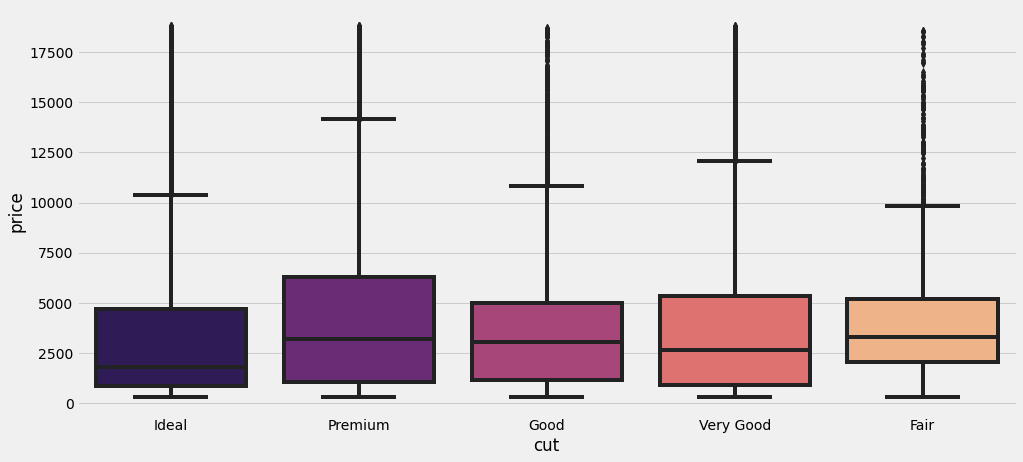

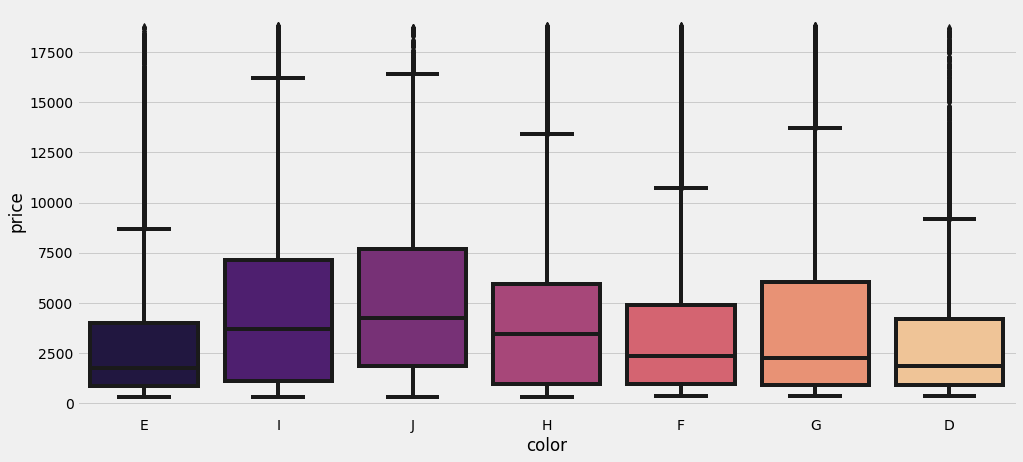

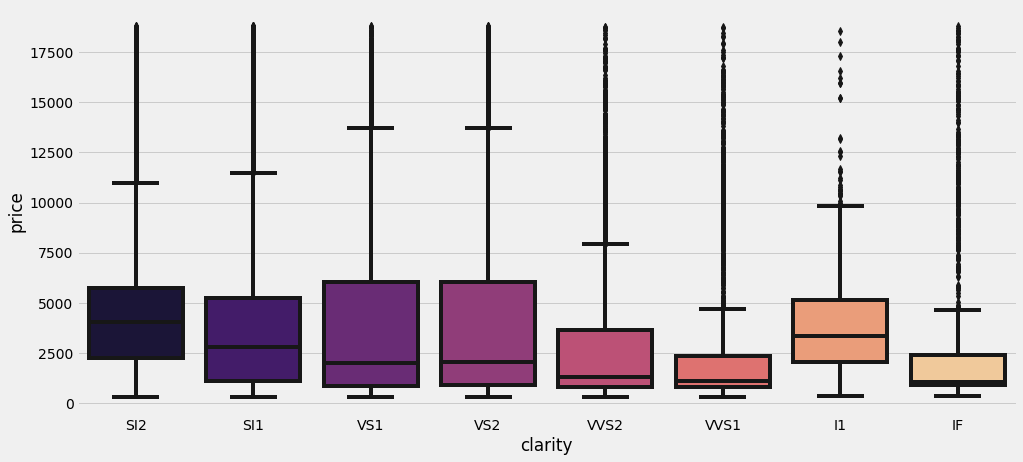

In [14]:
# Plotting the Price Distribution wrt to Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(dataset[col],dataset['price'],palette='magma')

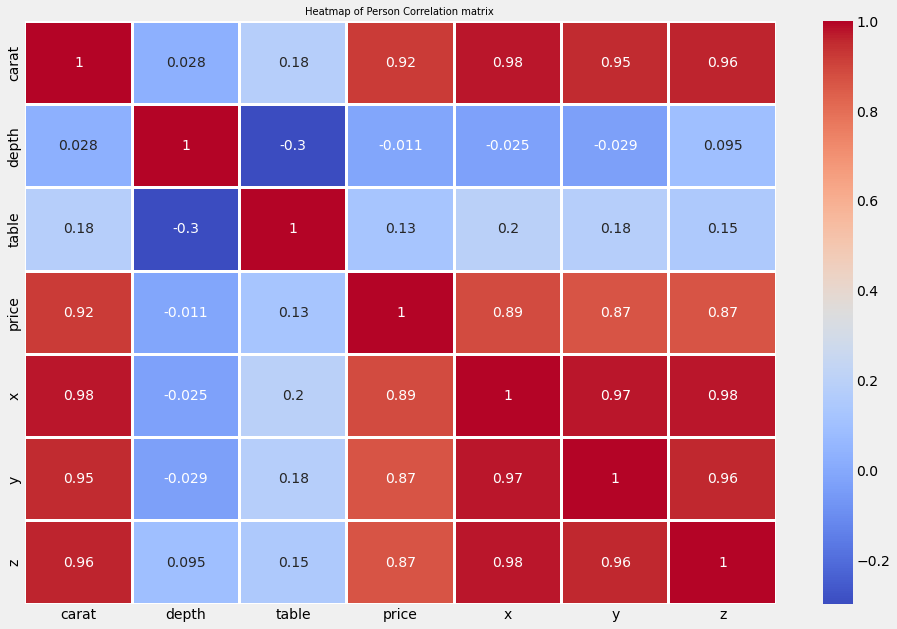

In [16]:
plt.figure(figsize=(15,10))
plt.title("Heatmap of Person Correlation matrix ",fontsize=10)
sns.heatmap(dataset.corr(method = 'pearson'), annot = True, cmap ='coolwarm', linewidths=2)

# **Categorical Data**

In [21]:
# One hot Encoding for Categorical Columns 
dataset= pd.get_dummies(dataset,columns=categorical_cols)

In [22]:
# Looking at the DataFrame after Encoding
dataset.tail()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
# Separating the featues and target variables
X = dataset.drop('price',axis=1)
y = dataset['price']

In [24]:
# Splitting the Data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [26]:
# Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNN(k=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
display(y_pred)

array([2690.33333333, 6953.66666667,  533.66666667, ..., 2191.        ,
       1568.33333333, 3938.33333333])

In [30]:
from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:  734538.3081672122
R2 Score:  0.9547764833284438


# KNN with sklearn

In [32]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
sk_preds = knn.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_test,sk_preds))
print('R2 Score: ',r2_score(y_test,sk_preds))

Mean Squared Error:  773747.0349717346
R2 Score:  0.9523625091482011
